In [1]:
# for manipulating dataframes
import pandas as pd
import numpy as np

import statsmodels.api as sm

# for visualizations
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
import pandas as pd
import os

# Define the folder containing the CSV files
folder_path = "../data"

# Define the columns to include
columns_to_use = ["Date/Time", "Kind", "Quantity", "Units", "Interval"]

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through all files in the folder
for file_name in os.listdir(folder_path):
    # Construct the full file path
    file_path = os.path.join(folder_path, file_name)
    
    # Check if the file is a CSV
    if file_name.endswith('.csv'):
        # Read the CSV, skipping the first 10 rows and selecting specified columns
        df = pd.read_csv(file_path, skiprows=9, usecols=columns_to_use)
        dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_dataframe = pd.concat(dataframes, ignore_index=True)

# Display the resulting DataFrame
print(combined_dataframe)


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [3]:
df.shape

(52116, 5)

In [4]:
df.head(20)

,Date/Time,Kind,Quantity,Units,Interval
0,12/26/2022 00:00,Reverse Usage,0.0000,kwh,15min
1,12/26/2022 00:00,Usage,0.1236,kwh,15min
2,12/26/2022 00:00,Net Usage,0.1236,kwh,15min
3,12/26/2022 00:15,Reverse Usage,0.0000,kwh,15min
4,12/26/2022 00:15,Usage,0.0804,kwh,15min
5,12/26/2022 00:15,Net Usage,0.0804,kwh,15min
6,12/26/2022 00:30,Reverse Usage,0.0000,kwh,15min
7,12/26/2022 00:30,Usage,1.1826,kwh,15min
8,12/26/2022 00:30,Net Usage,1.1826,kwh,15min
9,12/26/2022 00:45,Reverse Usage,0.0000,kwh,15min


In [5]:
dfx = combined_dataframe[combined_dataframe["Kind"] == "Usage"]

In [6]:
dfx = dfx.drop(columns=["Kind", "Units", "Interval"])
dfx.head()

,Date/Time,Quantity
1,01/01/2022 00:00,0.4290
4,01/01/2022 00:15,0.1494
7,01/01/2022 00:30,0.3636
10,01/01/2022 00:45,1.1712
13,01/01/2022 01:00,0.3258


In [7]:
# Convert 'Date/Time' to the desired format
dfx["Date/Time"] = pd.to_datetime(dfx["Date/Time"].str.strip()).dt.strftime("%Y-%m-%d %H:%M:%S")
dfx = dfx.set_index("Date/Time")
dfx = dfx.sort_index()

# Display the updated DataFrame
print(dfx.head())


                     Quantity
Date/Time                    
2022-01-01 00:00:00    0.4290
2022-01-01 00:15:00    0.1494
2022-01-01 00:30:00    0.3636
2022-01-01 00:45:00    1.1712
2022-01-01 01:00:00    0.3258


In [8]:
# Generate a complete range of 15-minute intervals
start_time = df["Date/Time"].min()
end_time = df["Date/Time"].max()
complete_range = pd.date_range(start=start_time, end=end_time, freq="15min")

# Sort the DataFrame
df = df.sort_values(by="Date/Time")

# Find missing timestamps
missing_timestamps = complete_range.difference(df["Date/Time"])

if missing_timestamps.empty:
    print("No missing data points.")
else:
    print("Missing data points:")
    print(missing_timestamps)

No missing data points.


In [9]:
dfx.head()

,Quantity
Date/Time,
2022-01-01 00:00:00,0.4290
2022-01-01 00:15:00,0.1494
2022-01-01 00:30:00,0.3636
2022-01-01 00:45:00,1.1712
2022-01-01 01:00:00,0.3258


In [10]:
dfx.dtypes

Quantity    float64
dtype: object

In [11]:
dfx.describe()

,Quantity
count,103059.000000
mean,0.308176
std,0.384464
min,0.000000
25%,0.018000
50%,0.160200
75%,0.460200
max,5.901600


In [12]:
dfx.to_csv("../electricity_usage/energy_use.csv", index=True)

In [13]:
# Ensure the index is a DateTimeIndex
dfx.index = pd.to_datetime(dfx.index)

# Slice the DataFrame for the year 2023 using boolean indexing
df_2023 = dfx[(dfx.index.year == 2023)]

In [14]:
df_2023.head()

,Quantity
Date/Time,
2023-01-01 00:00:00,0.3072
2023-01-01 00:15:00,0.2106
2023-01-01 00:30:00,0.2514
2023-01-01 00:45:00,0.2148
2023-01-01 01:00:00,0.2490


<Axes: xlabel='Date/Time'>

Text(0.5, 1.0, 'Observed')

<Axes: xlabel='Date/Time'>

Text(0.5, 1.0, 'Trend')

<Axes: xlabel='Date/Time'>

Text(0.5, 1.0, 'Seasonal')

<Axes: xlabel='Date/Time'>

Text(0.5, 1.0, 'Residual')

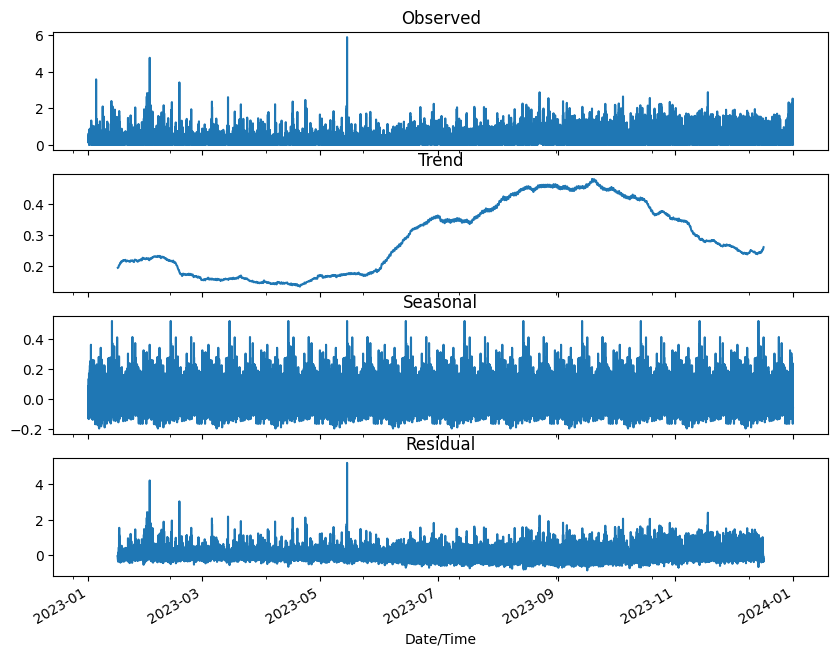

In [15]:
# Adjust period based on your data (e.g., 96 for daily if 15-min intervals)
result = sm.tsa.seasonal_decompose(df_2023["Quantity"], model="additive", period=2922)

# Plot the results
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
# Plot and set titles for each subplot
result.observed.plot(ax=axes[0])
axes[0].set_title('Observed')
result.trend.plot(ax=axes[1])
axes[1].set_title('Trend')
result.seasonal.plot(ax=axes[2])
axes[2].set_title('Seasonal')
result.resid.plot(ax=axes[3])
axes[3].set_title('Residual')